## Importing libraries

###Mount on drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Download related libraries

In [2]:
import nltk
nltk.download('stopwords')

import nltk
nltk.download('punkt')

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stemmerPorter = PorterStemmer()
stemmerSnow = nltk.SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [4]:
!pip install scikit-plot

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import statistics
from scipy.interpolate import make_interp_spline, BSpline

## Load and explore datasets

In [6]:
train_csv = '/content/gdrive/My Drive/datasets/vaccine_train_set.csv'

test_csv = '/content/gdrive/My Drive/datasets/vaccine_validation_set.csv'

In [7]:
import pandas as pd

df_train = pd.read_csv(train_csv)

df_train.head()

,Unnamed: 0,tweet,label
0,0,Sip N Shop Come thru right now #Marjais #Popul...,0
1,1,I don't know about you but My family and I wil...,1
2,2,@MSignorile Immunizations should be mandatory....,2
3,3,President Obama spoke in favor of vaccination ...,0
4,4,"""@myfoxla: Arizona monitoring hundreds for mea...",0


In [8]:
df_train.shape

(15976, 3)

In [9]:
df_train = df_train.drop(['Unnamed: 0'], axis=1)

In [10]:
df_test = pd.read_csv(test_csv)

df_test.head()

,Unnamed: 0,tweet,label
0,0,@user They had a massive surge in with covid d...,1
1,1,Required vaccines for school: Parents and guar...,0
2,2,“@KCStar: Two more Johnson County children hav...,0
3,3,NV can do better. Which states are the best (a...,2
4,4,Nothing like killing ourselves w/ our own fear...,2


In [11]:
df_test.shape

(2282, 3)

In [12]:
df_test = df_test.drop(['Unnamed: 0'], axis=1)

## Data preprocessing

#### Note: code bellow has been also implemented for the assignment of 'Big Data Mining Techniques'

In [13]:
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize as wt

stopWords = set(stopwords.words('english'))

In [14]:
def stem(data):
  f_data = []
  for row in range(data.shape[0]):
    merge = data.iloc[row, 2]
    tokenized_text = wt(merge)
    cleaned_text = []
    for word in tokenized_text:
      if word not in stopWords:
        cleaned_text.append(stemmerSnow.stem(word))
    final_text = ' '.join(cleaned_text)
    f_data.append(final_text)
  return data

def data_cleaning(df):
  df['cleaned_tweet'] = df['tweet'].apply(lambda x : re.sub(r'http\S+', ' ', x))
  df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x : re.sub(r'https\S+', ' ', x))
  # df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x : re.sub(r'@\S+', ' ', x))
  # df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x : re.sub(r'#\S+', ' ', x))
  df['cleaned_tweet'] = df['cleaned_tweet'].str.lower()
  # df['cleaned_tweet'] = df['cleaned_tweet'].str.encode('ascii', 'ignore').str.decode('ascii')
  # df['cleaned_tweet'] = df['cleaned_tweet'].str.replace('[^\w\s@/:%.,_-]', ' ', flags=re.UNICODE)
  df['cleaned_tweet'] = df['cleaned_tweet'].str.replace(r'[^\w\s]+', ' ', regex=True)
  # df['cleaned_tweet'] = df['cleaned_tweet'].str.replace(r'<[^>]+>', ' ', regex=True)
  # df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: re.sub(r"@[A-Za-z0-9]+", ' ', x))
  df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopWords)]))
  # df['cleaned_tweet'] = df['cleaned_tweet'].str.replace(r'\s+[a-zA-Z]\s+', ' ', regex=True)
  # df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x : re.sub('<.*?>',' ', x))
  # df['cleaned_tweet'] = df['cleaned_tweet'].str.replace(r'\d+', ' ', regex=True)
  # df['cleaned_tweet'] = df['cleaned_tweet'].str.replace(r'\s+', ' ', regex=True)
  stem(df)

In [15]:
data_cleaning(df_train)
data_cleaning(df_test)

In [16]:
import nltk

df_train['tokenized_tweets'] = df_train.apply(lambda row: nltk.word_tokenize(row['cleaned_tweet']), axis=1)
df_test['tokenized_tweets'] = df_test.apply(lambda row: nltk.word_tokenize(row['cleaned_tweet']), axis=1)

In [17]:
df_test.tweet[0]

'@user They had a massive surge in with covid deaths immediately after the vaccine rollout, way more than they had during the entirety of the "pandemic" up to that point. Fuck those jabs, Dr.Death.'

In [18]:
df_test.cleaned_tweet[0]

'user massive surge covid deaths immediately vaccine rollout way entirety pandemic point fuck jabs dr death'

In [19]:
df_test.tokenized_tweets[0]

['user',
 'massive',
 'surge',
 'covid',
 'deaths',
 'immediately',
 'vaccine',
 'rollout',
 'way',
 'entirety',
 'pandemic',
 'point',
 'fuck',
 'jabs',
 'dr',
 'death']

## Glove Embeddings

### Download GloVe

In [20]:
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2022-02-04 00:23:51--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-02-04 00:23:51--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.07MB/s    in 2m 41s  

2022-02-04 00:26:33 (5.10 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: 

### Classes Related to Glove Embeddings costruction

In [21]:
from keras.preprocessing.text import Tokenizer

### Class to represent glove embeddings
class GloVe_Emb():
  ## Initialize
  def __init__(self, file, dims):
    self.glove_file = file
    self.dims = dims
    self.glove_dict = {}

    with open(self.glove_file, 'r') as glove_embeddings:
      for entry in glove_embeddings:
        values = entry.split()
        word = values[0]
        vectors = np.asarray(values[1:], 'float32')
        # create a dictionary from glove dataset
        self.glove_dict[word] = vectors
    glove_embeddings.close()

  ## Associate dataset with glove embeddings
  def dataset_embeddings(self, corpus):
    corpus_embeddings = []
    for _, tokens in enumerate(corpus):
      # some tweets may have resulted in empty tokenization lists  
      if len(tokens) != 0:
        # initialize array with zeros   
        tweet_embeddings = np.zeros((len(tokens), self.dims))
        for idx, token in enumerate(tokens):
          # if word exists in glove dictionary get its vector
          if token in self.glove_dict:
            tweet_embeddings[idx] = self.glove_dict[token]
        # create an embedding vector for each tweet by calculating
        # the mean of its words' vectors
        corpus_embeddings.append(np.mean(tweet_embeddings, axis=0))
      else:
        # assign an empty vector to the tweet 
        corpus_embeddings.append(np.zeros(self.dims))
    return np.array(corpus_embeddings)

  def get_glove_dict(self):
    return self.glove_dict

### Contruction of embeddings for each tweet

In [22]:
# For other dataset, change `D_EMB` accordingly
D_EMB = 200
glove = GloVe_Emb('glove.6B.200d.txt', D_EMB)

In [23]:
glove_dict = glove.get_glove_dict()

In [24]:
train_emb = glove.dataset_embeddings(df_train['tokenized_tweets'])

In [25]:
train_emb.shape

(15976, 200)

In [26]:
test_emb = glove.dataset_embeddings(df_test['tokenized_tweets'])

In [27]:
test_emb.shape

(2282, 200)

## Create Dataset Tensors

In [29]:
import torch

X_train, y_train = torch.tensor(train_emb, dtype=torch.float), torch.tensor(df_train.label)
X_test, y_test = torch.tensor(test_emb, dtype=torch.float), torch.tensor(df_test.label)

## Run to GPU if available

In [30]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device available for running: ')
print(device)

Device available for running: 
cuda


## Feed Forward Network Classes

In [31]:
### Dummy class to assist inserting datasets to dataloader
class Dataset():
  def __init__(self, X, y):
    self.x_data, self.y_data = X, y

  def __len__(self):
    return len(self.x_data)

  def __getitem__(self, idx):
    return self.x_data[idx], self.y_data[idx]

In [32]:
import torch.nn as nn

class FeedForwardNeuralNet_1U(nn.Module):
    def __init__(self, input_dim, output_dim, activation='ReLU'):
        super(FeedForwardNeuralNet_1U, self).__init__()
        # Linear function 1
        self.fc1 = nn.Linear(input_dim, output_dim) 

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        return out

In [33]:
import torch.nn as nn

class FeedForwardNeuralNet_2U(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, activation='ReLU'):
        super(FeedForwardNeuralNet_2U, self).__init__()
        # Linear function 1
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        if activation == 'ReLU':
          self.activation = nn.ReLU()
        else:
          self.activation = nn.Sigmoid()
        # Linear function 2
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.activation(out)
        # Linear function 2
        out = self.fc2(out)
        return out

In [34]:
import torch.nn as nn

class FeedForwardNeuralNet_3U(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim, activation='ReLU'):
        super(FeedForwardNeuralNet_3U, self).__init__()
        # Linear function 1
        self.fc1 = nn.Linear(input_dim, hidden_dims[0]) 
        # Non-linearity 1
        if activation == 'ReLU':
          self.act = nn.ReLU()
        else:
          self.act = nn.Sigmoid()
        # Linear function 2
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        # Linear function 3 (readout)
        self.fc3 = nn.Linear(hidden_dims[1], output_dim)  

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.act(out)
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.act(out)
        # Linear function 3 (readout)
        out = self.fc3(out)
        return out

## Experiments Class: This class was implemented to assist in running multiple experiments 

In [35]:
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
import scikitplot as skplt

class Experiments():
  def __init__(self, model, epochs, criterion, optimizer, train_dataloader, test_dataloader):
    # feed forward neural network
    self.nn = model
    # train parameters
    self.epochs = epochs
    self.criterion = criterion
    self.optimizer = optimizer
    # datasets
    self.train_dataloader = train_dataloader
    self.test_dataloader = test_dataloader
    # stats
    self.train_scores = {'loss':[], 'accuracy':[], 'predicted_labels':[]}
    self.val_scores = {'loss':[], 'accuracy':[], 'predicted_labels':[]}

  def get_pred_labels(self, out):
    # apply softmax before obtaining results
    soft_pred = torch.log_softmax(out, dim=1)
    # get prediction labels
    _, pred = torch.max(soft_pred, dim=1)
    return pred
  
  def compute_accuracy(self, labels, pred):
    correct = (pred == labels).float()
    accuracy = correct.sum() / len(correct)
    return accuracy
  
  def compute_scores(self, accuracy, loss, n, pred, contrainer):
    contrainer['accuracy'].append(accuracy/n)
    contrainer['loss'].append(loss/n)
    contrainer['predicted_labels'].append(np.concatenate(pred).ravel().tolist())

  def get_train_scores(self):
    return self.train_scores
  
  def get_validation_scores(self):
    return self.val_scores
  
  def epoch_report(self, epoch, labels, method = 'train'):
    if method == 'train':
      print('====')
      print('Classification report for train set')
      print('====')
      print(classification_report(labels, self.train_scores['predicted_labels'][epoch-1]))
    else:
      print('====')
      print('Classification report for validation set')
      print('====')
      print(classification_report(labels, self.val_scores['predicted_labels'][epoch-1]))

  def plot_roc_curves(self, X, y):
    X = X.to(device)
    pred = model.forward(X).cpu().detach().numpy()
    skplt.metrics.plot_roc(y, pred)
  
  def plot_loss_curves(self):
    plt.figure(figsize=(10,10))
    plt.title("Training / Validation Loss Curves")
    plt.plot(self.train_scores['loss'],'-b')
    plt.plot(self.val_scores['loss'],'-g')
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.legend(('Training','Validation'), loc='upper right', fontsize='x-large')
    plt.show()

  def run(self):
    # iterate for each epoch
    for epoch in range(self.epochs):
      # train mode
      # self.nn.train()
      train_loss = 0
      train_pred = []
      train_accuracy = 0
      # train per batches
      for idx, (X, y) in enumerate(self.train_dataloader):
        X.to(device)
        y.to(device)
        # forward pass
        out = self.nn.forward(X)
        loss = self.criterion(out, y)
        # backward pass and update
        self.optimizer.zero_grad()
        loss.backward(retain_graph=True)
        self.optimizer.step()
        # stats
        batch_pred = self.get_pred_labels(out)
        train_accuracy += self.compute_accuracy(y, batch_pred)
        train_loss += loss.item()
        train_pred.append(batch_pred.cpu().numpy())
      # compute final stats
      self.compute_scores(train_accuracy, train_loss, len(train_dataloader), train_pred, self.train_scores)

      # predict on validation set
      with torch.no_grad():
        # evaluation mode
        # self.nn.eval()
        val_loss = 0
        val_pred = []
        val_accuracy = 0
        # evaluate per batches
        for idx, (X_val, y_val) in enumerate(self.test_dataloader):
          X_val.to(device)
          y_val.to(device)
          # get predictions
          out = self.nn.forward(X_val)
          loss = self.criterion(out, y_val)
          # stats
          batch_pred = self.get_pred_labels(out)
          val_accuracy += self.compute_accuracy(y_val, batch_pred)
          val_loss += loss.item()
          val_pred.append(batch_pred.cpu().numpy())
        # compute final stats
        self.compute_scores(val_accuracy, val_loss, len(test_dataloader), val_pred, self.val_scores)

        # verbose
        # print('Epoch: {}. Train Loss: {}. Val Loss: {}. Train Accuracy: {} Val Accuracy: {}'.format(epoch, (train_loss/len(self.train_dataloader)), (val_loss/len(self.test_dataloader)), (train_accuracy/len(self.train_dataloader)), (val_accuracy/len(self.test_dataloader))))

## Running Experiments & Final Model

Most of the experiments in this section are commented out to avoid unnecessary runs. The results of the selected model are presented at the bottom of the section.


### Model 1:  

*   Network: 1 Layer Feed Forward Network
*   Loss: Cross Entropy
*   Learning Rate: 0.001
*   Optimizer SGD
*   Epochs: 14


In [36]:
"""
from sklearn.utils import class_weight
from torch.utils.data.dataloader import default_collate

batch_size = 32
train_dataset = Dataset(X_train, y_train)
test_dataset = Dataset(X_test, y_test)
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))

input_dim = X_train.shape[1]
output_dim = 3

model = FeedForwardNeuralNet_1U(input_dim, output_dim)
model.to(device)

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(df_train.label), y=df_train.label)
class_weights = torch.tensor(class_weights,dtype=torch.float)

criterion = nn.CrossEntropyLoss(weight=class_weights, reduction='mean')
criterion = criterion.to(device)

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_epochs = 20
exp_1U = Experiments(model, n_epochs, criterion, optimizer, train_dataloader, test_dataloader)
exp_1U.run() """

"\nfrom sklearn.utils import class_weight\nfrom torch.utils.data.dataloader import default_collate\n\nbatch_size = 32\ntrain_dataset = Dataset(X_train, y_train)\ntest_dataset = Dataset(X_test, y_test)\ntrain_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))\ntest_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))\n\ninput_dim = X_train.shape[1]\noutput_dim = 3\n\nmodel = FeedForwardNeuralNet_1U(input_dim, output_dim)\nmodel.to(device)\n\nclass_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(df_train.label), y=df_train.label)\nclass_weights = torch.tensor(class_weights,dtype=torch.float)\n\ncriterion = nn.CrossEntropyLoss(weight=class_weights, reduction='mean')\ncriterion = criterion.to(device)\n\nlearning_rate = 0.001\nop

In [37]:
"""
exp_1U.epoch_report(14, df_test.label.to_list(), 'val')
"""

"\nexp_1U.epoch_report(14, df_test.label.to_list(), 'val')\n"

In [38]:
"""
exp_1U.plot_loss_curves()
"""

'\nexp_1U.plot_loss_curves()\n'

### Model 2:  

*   Network: 2 Layer Feed Forward Network
*   Loss: Cross Entropy
*   Learning Rate: 0.001
*   Optimizer SGD
*   Epochs: 40


In [39]:
"""
input_dim = X_train.shape[1]
hidden_dim = 64
output_dim = 3

batch_size = 64
train_dataset = Dataset(X_train, y_train)
test_dataset = Dataset(X_test, y_test)
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))

model = FeedForwardNeuralNet_2U(input_dim, hidden_dim, output_dim)
model.to(device)

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(df_train.label), y=df_train.label)
class_weights = torch.tensor(class_weights,dtype=torch.float)

criterion = nn.CrossEntropyLoss(weight=class_weights, reduction='mean')
criterion = criterion.to(device)

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_epochs = 100
exp_2U = Experiments(model, n_epochs, criterion, optimizer, train_dataloader, test_dataloader)
exp_2U.run()
"""

"\ninput_dim = X_train.shape[1]\nhidden_dim = 64\noutput_dim = 3\n\nbatch_size = 64\ntrain_dataset = Dataset(X_train, y_train)\ntest_dataset = Dataset(X_test, y_test)\ntrain_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))\ntest_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))\n\nmodel = FeedForwardNeuralNet_2U(input_dim, hidden_dim, output_dim)\nmodel.to(device)\n\nclass_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(df_train.label), y=df_train.label)\nclass_weights = torch.tensor(class_weights,dtype=torch.float)\n\ncriterion = nn.CrossEntropyLoss(weight=class_weights, reduction='mean')\ncriterion = criterion.to(device)\n\nlearning_rate = 0.001\noptimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)\n\nn_e

In [40]:
"""
exp_2U.epoch_report(40, df_test.label.to_list(), 'val')
"""

"\nexp_2U.epoch_report(40, df_test.label.to_list(), 'val')\n"

In [41]:
"""
exp_2U.plot_loss_curves()
"""

'\nexp_2U.plot_loss_curves()\n'

### Model 3:  

*   Network: 3 Layer Feed Forward Network
*   Loss: Cross Entropy
*   Learning Rate: 0.001
*   Optimizer SGD
*   Epochs: 50


In [42]:
"""
input_dim = X_train.shape[1]
hidden_dims = [128, 64]
output_dim = 3

batch_size = 32
train_dataset = Dataset(X_train, y_train)
test_dataset = Dataset(X_test, y_test)
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))

model = FeedForwardNeuralNet_3U(input_dim, hidden_dims, output_dim)
model.to(device)

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(df_train.label), y=df_train.label)
class_weights = torch.tensor(class_weights,dtype=torch.float)

criterion = nn.CrossEntropyLoss(weight=class_weights,reduction='mean')
criterion = criterion.to(device)

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_epochs = 50
exp_3U = Experiments(model, n_epochs, criterion, optimizer, train_dataloader, test_dataloader)
exp_3U.run()
"""

"\ninput_dim = X_train.shape[1]\nhidden_dims = [128, 64]\noutput_dim = 3\n\nbatch_size = 32\ntrain_dataset = Dataset(X_train, y_train)\ntest_dataset = Dataset(X_test, y_test)\ntrain_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))\ntest_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))\n\nmodel = FeedForwardNeuralNet_3U(input_dim, hidden_dims, output_dim)\nmodel.to(device)\n\nclass_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(df_train.label), y=df_train.label)\nclass_weights = torch.tensor(class_weights,dtype=torch.float)\n\ncriterion = nn.CrossEntropyLoss(weight=class_weights,reduction='mean')\ncriterion = criterion.to(device)\n\nlearning_rate = 0.001\noptimizer = torch.optim.SGD(model.parameters(), lr=learning_rate

In [43]:
"""
exp_3U.epoch_report(50, df_test.label.to_list(), 'val')
"""

"\nexp_3U.epoch_report(50, df_test.label.to_list(), 'val')\n"

In [44]:
"""
exp_3U.plot_loss_curves()
"""

'\nexp_3U.plot_loss_curves()\n'

### Model 4:  

*   Network: 3 Layer Feed Forward Network
*   Loss: Cross Entropy
*   Learning Rate: 0.001
*   Optimizer SGD + Momentum (0.9)
*   Epochs: 7


In [45]:
"""
from sklearn.utils import class_weight
from torch.utils.data.dataloader import default_collate

input_dim = X_train.shape[1]
hidden_dims = [128, 64]
output_dim = 3

batch_size = 32
train_dataset = Dataset(X_train, y_train)
test_dataset = Dataset(X_test, y_test)
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))

model = FeedForwardNeuralNet_3U(input_dim, hidden_dims, output_dim)
model.to(device)

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(df_train.label), y=df_train.label)
class_weights = torch.tensor(class_weights,dtype=torch.float)

criterion = nn.CrossEntropyLoss(weight=class_weights, reduction='mean')
criterion = criterion.to(device)

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_epochs = 15
exp_3U_1 = Experiments(model, n_epochs, criterion, optimizer, train_dataloader, test_dataloader)
exp_3U_1.run()
"""

"\nfrom sklearn.utils import class_weight\nfrom torch.utils.data.dataloader import default_collate\n\ninput_dim = X_train.shape[1]\nhidden_dims = [128, 64]\noutput_dim = 3\n\nbatch_size = 32\ntrain_dataset = Dataset(X_train, y_train)\ntest_dataset = Dataset(X_test, y_test)\ntrain_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))\ntest_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))\n\nmodel = FeedForwardNeuralNet_3U(input_dim, hidden_dims, output_dim)\nmodel.to(device)\n\nclass_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(df_train.label), y=df_train.label)\nclass_weights = torch.tensor(class_weights,dtype=torch.float)\n\ncriterion = nn.CrossEntropyLoss(weight=class_weights, reduction='mean')\ncriterion = criterion.t

In [46]:
"""
exp_3U_1.epoch_report(7, df_test.label.to_list(), 'val')
"""

"\nexp_3U_1.epoch_report(7, df_test.label.to_list(), 'val')\n"

In [47]:
"""
exp_3U_1.plot_loss_curves()
"""

'\nexp_3U_1.plot_loss_curves()\n'

### Model 5:  

*   Network: 3 Layer Feed Forward Network
*   Loss: Cross Entropy
*   Learning Rate: 0.001
*   Optimizer SGD + Momentum (0.9) + Nasterov
*   Epochs: 7


In [48]:
"""
from sklearn.utils import class_weight
from torch.utils.data.dataloader import default_collate

input_dim = X_train.shape[1]
hidden_dims = [128, 64]
output_dim = 3

batch_size = 32
train_dataset = Dataset(X_train, y_train)
test_dataset = Dataset(X_test, y_test)
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))

model = FeedForwardNeuralNet_3U(input_dim, hidden_dims, output_dim)
model.to(device)

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(df_train.label), y=df_train.label)
class_weights = torch.tensor(class_weights,dtype=torch.float)

criterion = nn.CrossEntropyLoss(weight=class_weights, reduction='mean')
criterion = criterion.to(device)

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, nesterov=True)
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_epochs = 7
exp_3U_2 = Experiments(model, n_epochs, criterion, optimizer, train_dataloader, test_dataloader)
exp_3U_2.run()
"""

"\nfrom sklearn.utils import class_weight\nfrom torch.utils.data.dataloader import default_collate\n\ninput_dim = X_train.shape[1]\nhidden_dims = [128, 64]\noutput_dim = 3\n\nbatch_size = 32\ntrain_dataset = Dataset(X_train, y_train)\ntest_dataset = Dataset(X_test, y_test)\ntrain_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))\ntest_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))\n\nmodel = FeedForwardNeuralNet_3U(input_dim, hidden_dims, output_dim)\nmodel.to(device)\n\nclass_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(df_train.label), y=df_train.label)\nclass_weights = torch.tensor(class_weights,dtype=torch.float)\n\ncriterion = nn.CrossEntropyLoss(weight=class_weights, reduction='mean')\ncriterion = criterion.t

In [49]:
"""
exp_3U_2.plot_loss_curves()
"""

'\nexp_3U_2.plot_loss_curves()\n'

In [50]:
"""
exp_3U_2.epoch_report(7, df_test.label.to_list(), 'val')
"""

"\nexp_3U_2.epoch_report(7, df_test.label.to_list(), 'val')\n"

### Model 6:  

*   Network: 3 Layer Feed Forward Network
*   Loss: Cross Entropy
*   Learning Rate: 0.00001
*   Optimizer Adam
*   Epochs: 12



In [51]:
"""
from sklearn.utils import class_weight
from torch.utils.data.dataloader import default_collate

input_dim = X_train.shape[1]
hidden_dims = [128, 64]
output_dim = 3

batch_size = 32
train_dataset = Dataset(X_train, y_train)
test_dataset = Dataset(X_test, y_test)
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))

model = FeedForwardNeuralNet_3U(input_dim, hidden_dims, output_dim)
model.to(device)

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(df_train.label), y=df_train.label)
class_weights = torch.tensor(class_weights,dtype=torch.float)

criterion = nn.CrossEntropyLoss(weight=class_weights, reduction='mean')
criterion = criterion.to(device)

learning_rate = 0.00001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_epochs = 20
exp_3U_3 = Experiments(model, n_epochs, criterion, optimizer, train_dataloader, test_dataloader)
exp_3U_3.run()
"""

"\nfrom sklearn.utils import class_weight\nfrom torch.utils.data.dataloader import default_collate\n\ninput_dim = X_train.shape[1]\nhidden_dims = [128, 64]\noutput_dim = 3\n\nbatch_size = 32\ntrain_dataset = Dataset(X_train, y_train)\ntest_dataset = Dataset(X_test, y_test)\ntrain_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))\ntest_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))\n\nmodel = FeedForwardNeuralNet_3U(input_dim, hidden_dims, output_dim)\nmodel.to(device)\n\nclass_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(df_train.label), y=df_train.label)\nclass_weights = torch.tensor(class_weights,dtype=torch.float)\n\ncriterion = nn.CrossEntropyLoss(weight=class_weights, reduction='mean')\ncriterion = criterion.t

In [52]:
"""
exp_3U_3.plot_loss_curves()
"""

'\nexp_3U_3.plot_loss_curves()\n'

In [53]:
"""
exp_3U_3.epoch_report(12, df_test.label.to_list(), 'val')
"""

"\nexp_3U_3.epoch_report(12, df_test.label.to_list(), 'val')\n"

## Selected Model:  

*   Network: 3 Layer Feed Forward Network
*   Loss: Cross Entropy
*   Learning Rate: 0.00001
*   Optimizer Adam + AmsGrad
*   Epochs: 12





In [63]:
from sklearn.utils import class_weight
from torch.utils.data.dataloader import default_collate

input_dim = X_train.shape[1]
hidden_dims = [128, 64]
output_dim = 3

batch_size = 32
train_dataset = Dataset(X_train, y_train)
test_dataset = Dataset(X_test, y_test)

train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))

model = FeedForwardNeuralNet_3U(input_dim, hidden_dims, output_dim)
model.to(device)

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(df_train.label), y=df_train.label)
class_weights = torch.tensor(class_weights,dtype=torch.float)

criterion = nn.CrossEntropyLoss(weight=class_weights, reduction='mean')
criterion = criterion.to(device)

learning_rate = 0.00001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, amsgrad=True)
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_epochs = 12
exp_3U_4 = Experiments(model, n_epochs, criterion, optimizer, train_dataloader, test_dataloader)
exp_3U_4.run()

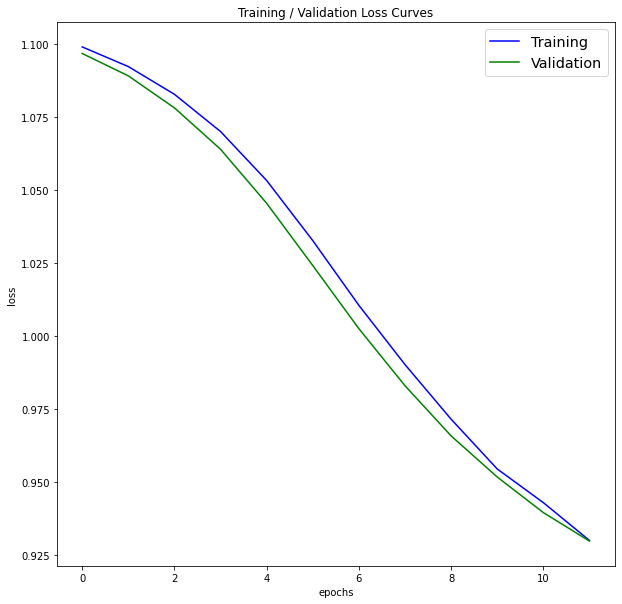

In [64]:
exp_3U_4.plot_loss_curves()

In [65]:
exp_3U_4.epoch_report(12, df_test.label.to_list(), 'val')

====
Classification report for validation set
====
              precision    recall  f1-score   support

           0       0.73      0.67      0.70      1065
           1       0.30      0.61      0.40       296
           2       0.65      0.50      0.56       921

    accuracy                           0.59      2282
   macro avg       0.56      0.59      0.56      2282
weighted avg       0.64      0.59      0.61      2282



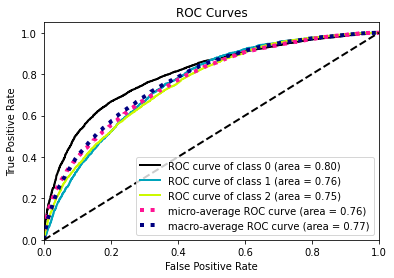

In [66]:
exp_3U_4.plot_roc_curves(X_train, y_train)

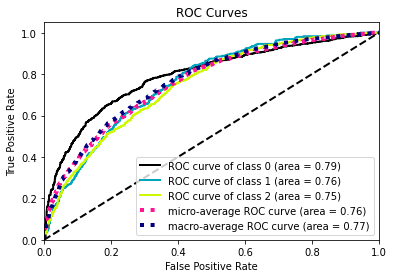

In [67]:
exp_3U_4.plot_roc_curves(X_test, y_test)